# Homework 1

In [80]:
from scipy.special import legendre
from scipy.integrate import trapz
from numpy import exp, linspace
import numpy as np
import matplotlib.pyplot as plt

In [81]:
def coefficient(order):
    x = linspace(-1, 1, 10000)
    c = (order + 0.5) * trapz(exp(-x) * legendre(order)(x), x)
    return c

In [82]:
coefficient(0)

1.1752011975619223

In [83]:
coefficient(1)

-1.1036383507025824

In [84]:
coefficient(2)

0.35781444740744162

In [85]:
def approx(x, order):
    ans = 0
    cs = [coefficient(i) for i in range(order+1)]
    ls = [legendre(i)(x) for i in range(order+1)]
    return np.array(cs) @ np.array(ls)

In [86]:
def error(order):
    x = linspace(-1, 1, 1000)
    p = approx(x, order)
    t = exp(-x)
    e = abs(p - t) / t
    return max(e)

In [87]:
error(10)

1.4114772791518178e-05

In [88]:
def approx_plot(order):
    x = linspace(-1, 1, 1000)
    plt.plot(x, approx(x, order))
    plt.plot(x, exp(x))
    plt.show()

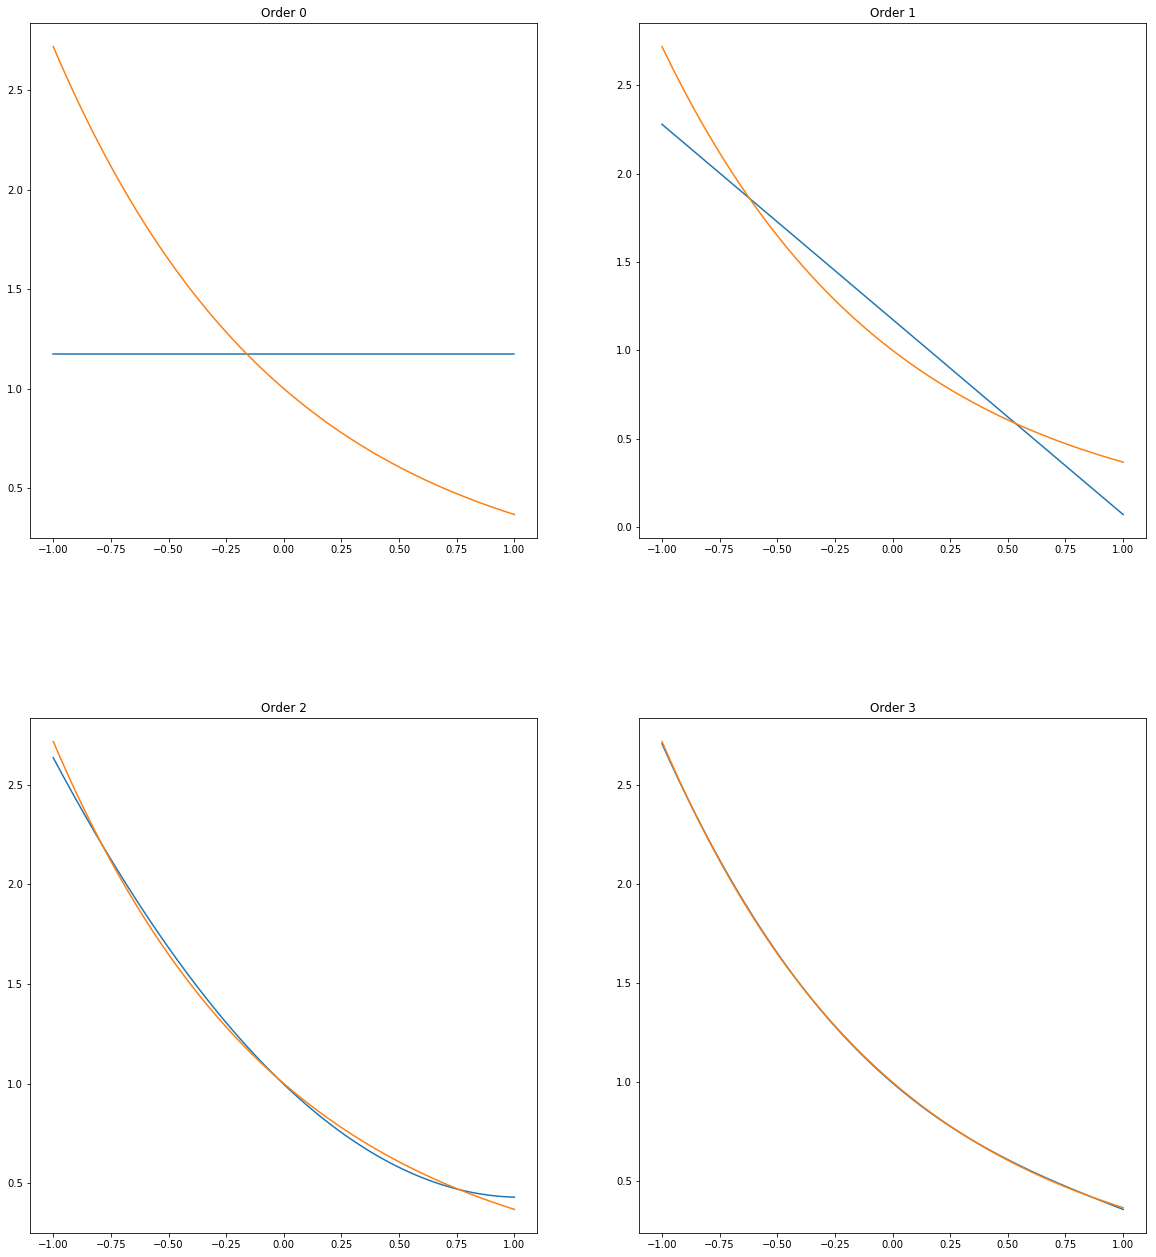

In [106]:
f = plt.figure(figsize=(20,20))

x = linspace(-1, 1, 1000)

ax1 = f.add_subplot(221)
ax1.plot(x, approx(x, 0))
ax1.plot(x, exp(-x))
ax1.set_title('Order 0')

ax2 = f.add_subplot(222)
ax2.plot(x, approx(x, 1))
ax2.plot(x, exp(-x))
ax2.set_title('Order 1')

ax3 = f.add_subplot(223)
ax3.plot(x, approx(x, 2))
ax3.plot(x, exp(-x))
ax3.set_title('Order 2')

ax4 = f.add_subplot(224, sharex=ax2)
ax4.plot(x, approx(x, 3))
ax4.plot(x, exp(-x))
ax4.set_title('Order 3')

plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.35)

plt.show()


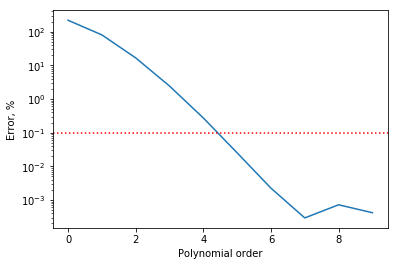

In [102]:
i = range(10)
o = [100 * error(_) for _ in i]
#for i in [0, 1, 5, 10, 50]:
    #plt.bar(x = i, height=error(i), width=0.5)
plt.plot(i, o)
plt.ylabel('Error, %')
plt.xlabel('Polynomial order')
plt.yscale('log')
plt.axhline(y=0.1, linestyle=':', color='r')
plt.show()

In [104]:
error(5)*100

0.025183230049561148